# Importing, merging, visualizing, and modelling data

*Author*: Milena Tsvetkova

In this demo, we will import and merge different data and then analyse and visualize them. We will use several libraries for data manipulation, plotting, and analysis that data scientists use.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Importing data

In [81]:
# Import estimates of brand's "socioeconomic status" based on their Twitter followers
# See: He, Y., & Tsvetkova, M. (2023). A method for estimating individual socioeconomic 
# status of Twitter users. Sociological Methods & Research, 00491241231168665. 
# https://doi.org/10.1177/00491241231168665

# Read SES data and print size and first few rows
df_ses = pd.read_csv("data/est_brands.csv")
print(df_ses.shape)
print(df_ses.head())

(339, 2)
    screen_name       ses
0       48hours  0.951619
1     60Minutes  1.507003
2       7eleven -0.080086
3  ABCSharkTank  1.019819
4   Abercrombie -0.198900


In [82]:
# Import Facebook audience data
df_fb = pd.read_csv("data/fb_audience.csv")
print(df.shape)
print(df.head())

(335, 7)
       screen_name  high_school_grad  university_grad  master_deg  \
0          7eleven          0.211548         0.385764    0.034843   
1      Abercrombie          0.170564         0.331651    0.030796   
2  abercrombiekids          0.201161         0.394027    0.037329   
3          Academy          0.255611         0.408977    0.033229   
4      AceHardware          0.253365         0.380048    0.033254   

   doctorate_deg  professional_deg       ses  
0       0.002738          0.004355 -0.080086  
1       0.001658          0.002203 -0.198900  
2       0.002074          0.002903 -0.007456  
3       0.001866          0.003067 -0.115978  
4       0.002534          0.004117 -0.589561  


## Merging data

In [83]:
# Merge the two datasets on screen_name
# Keep all rows, even if there is no match in the other dataset
df = pd.merge(df_fb, df_ses, on="screen_name", how="outer")
print(df.shape)

# Summarise missing data
print(df.isnull().sum())

(341, 17)
brand               46
screen_name          0
urban               46
age18_24            46
age25_34            46
age35_44            46
age45_54            46
age55_64            46
age65plus           46
male                46
female              46
high_school_grad     4
university_grad      4
master_deg           4
doctorate_deg        4
professional_deg     4
ses                  2
dtype: int64


In [84]:
# We will only work with see and the education data, 
# so we will drop the other columns and rows with missing data
df = df[['screen_name', 'high_school_grad', 'university_grad', 
         'master_deg', 'doctorate_deg', 'professional_deg', 
         'ses']].dropna()
print(df.shape)

(335, 7)


## Plotting data

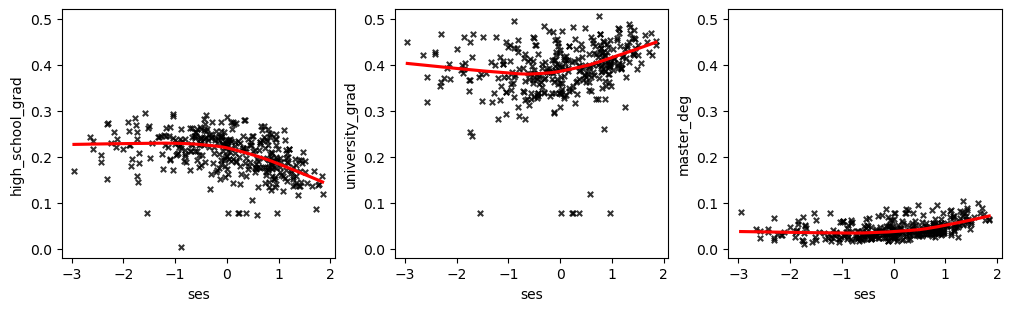

In [109]:
# Plot a scatter plot with a fitted linear regression line 
# for three different levels of education

ed = ['high_school_grad', 'university_grad', 'master_deg']

fig, axs = plt.subplots(ncols=3, figsize=(10, 3), layout='constrained')
# We will use a for-loop to plot the three subplots
for i, var in enumerate(ed):
    sns.regplot(x='ses', y=var, data=df, lowess=True, 
                marker='x', color='k', scatter_kws={'s': 15}, 
                line_kws=dict(color='r'), ax=axs[i])
    axs[i].set_ylim(-0.02, 0.52)

## Modelling data

In [86]:
# Define regression model with main and quadratic effect
# for high_school_grad
model = smf.ols('ses ~ high_school_grad + I(high_school_grad**2)', data=df)

# Fit model
results = model.fit()

# Inspect results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    ses   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     33.07
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           7.99e-14
Time:                        19:47:50   Log-Likelihood:                -442.63
No. Observations:                 335   AIC:                             891.3
Df Residuals:                     332   BIC:                             902.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               